In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
# add quality_label column
for wine_type in [red_wine, white_wine]:
    # we are creating a new column called "quality_label", we define a range and associate that range with a label
    wine_type['quality_label'] = wine_type['quality'].apply(lambda value: 'low'
    if value <= 5 else 'medium'
    if value <= 7 else 'high')

    # here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
    wine_type['quality_label'] = pd.Categorical(wine_type['quality_label'],
    categories=['low', 'medium', 'high'])

In [4]:
# create a df with all wines for exercises later

# add color of wine as parameter
red_wine['color'] = 'red'
white_wine['color'] = 'white'

# combine the wine dfs
wine = pd.concat([red_wine, white_wine])

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['color'] = pd.Categorical(wine['color'],
categories=['red', 'white'])

# Epic 1: Univariate Analysis
This is perhaps one of the easiest yet a core foundational step in exploratory data analysis. Univariate analysis involves analyzing data such that at any instance of analysis you are only dealing with one variable or feature. No relationships or correlations are analyzed among multiple variables. The simplest way to easily visualize all the variables in your data is to build some histograms.

The following snippet helps visualize distributions of data values for all features. While histogram may not be an appropriate visualization in many cases, it is a good one to start with for numeric data.

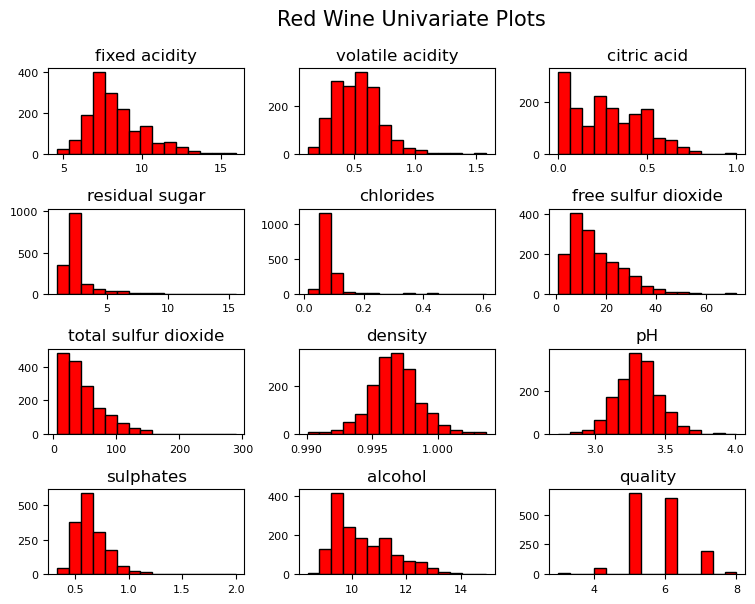

In [5]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

It is important to note that we are using the [pandas hist() method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html). This function calls the matplotlib hist() method, on each series in the DataFrame, resulting in one histogram per column.

Since we just want to look at the distribution, we don't really care now if the Y-Axis has different value for each histogram.

Try to do the same for white wine.

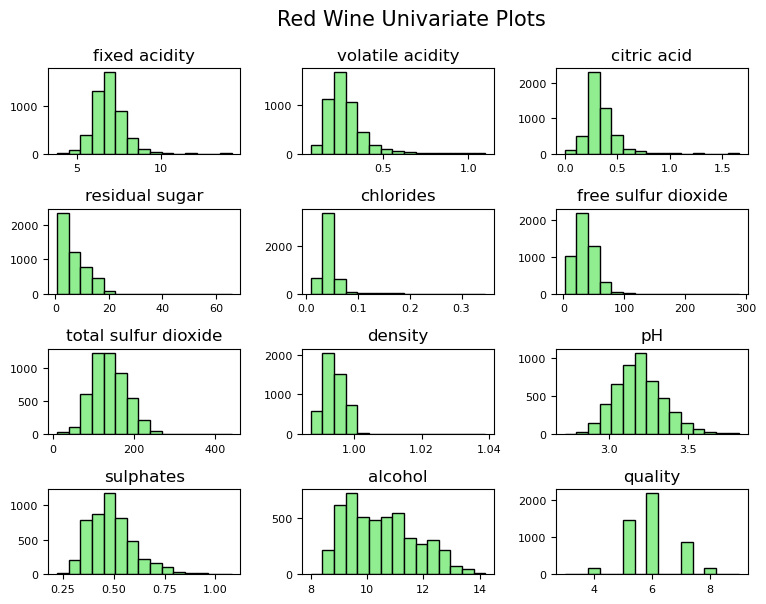

In [6]:
white_wine.hist(bins=15, color='lightgreen', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

Read this article too: https://www.kaggle.com/residentmario/univariate-plotting-with-pandas

The power of packages like matplotlib and pandas enable you to easily plot variable distributions. Do you notice any interesting patterns across the two wine types?

You can choose single features and analyze them.

For example, take the feature named residual sugar and plot the distributions across data pertaining to red and white wine samples.

Try to reproduce the same [histograms](https://seaborn.pydata.org/generated/seaborn.histplot.html): include the title, the labels, and make sure this time the Y-Axis have the same limit. Also, notice how the values on the x-axis have been binned.

Hint: title, labels and Y-Axis limit are all features of the [axes class](https://matplotlib.org/stable/api/axes_api.html)!

Do the same with other features to see if there are more interesting observations.

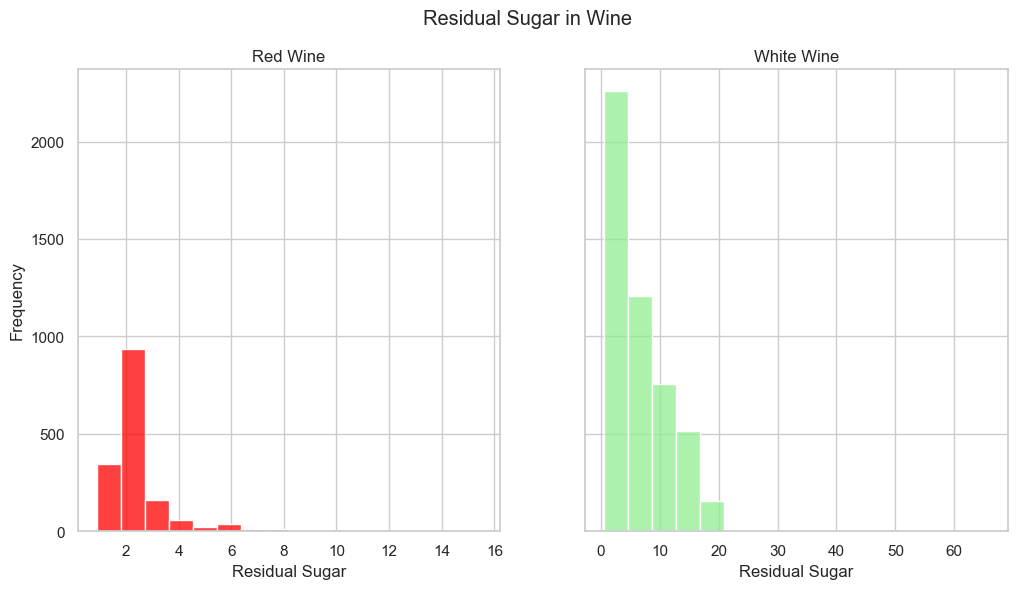

In [40]:
# plot the distributions of residual sugar across data pertaining to red and white wine samples

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side plot
# make sure this time the Y-Axis have the same limit (sharey=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(data=red_wine, x='residual sugar', color='red', bins=16, ax=axes[0])
sns.histplot(data=white_wine, x='residual sugar', color='lightgreen', bins=16, ax=axes[1])

# set labels for the x-axis
axes[0].set(xlabel='Residual Sugar')
axes[1].set(xlabel='Residual Sugar')

# set label for y-axis
axes[0].set(ylabel='Frequency')

# set titles for plots
axes[0].set_title('Red Wine')
axes[1].set_title('White Wine')

# use plt.suptitle to set the main title
plt.suptitle('Residual Sugar in Wine')

# show the plot
plt.show()

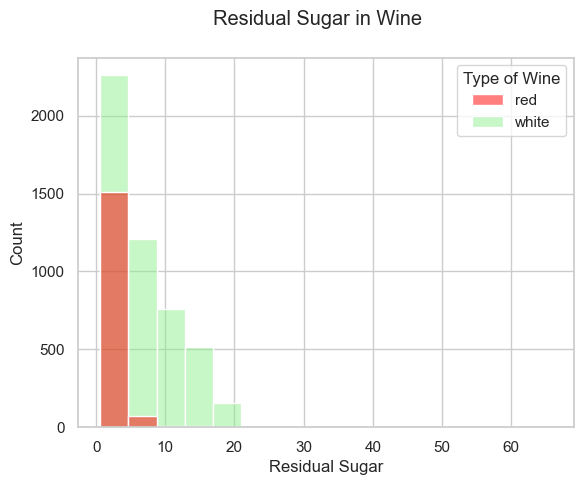

In [41]:
# plot the distributions of residual sugar across data pertaining to red and white wine samples
# but in one graph with the data overlaping and having the same x and y axes.

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure
fig, ax = plt.subplots()

# create a custom color palette with red and light green
custom_palette = sns.color_palette(["red", "lightgreen"])

ax = sns.histplot(data=wine, x='residual sugar', hue='color', bins=16, palette=custom_palette)

# set label for the x-axis
ax.set(xlabel='Residual Sugar')

# use plt.suptitle to set the main title
plt.suptitle('Residual Sugar in Wine')

# get the legend and change the title
legend = ax.get_legend()
legend.set_title("Type of Wine")

# show the plot
plt.show()

# Epic 2: Multivariate Analysis
Analyzing multiple feature variables and their relationships is what multivariate analysis is all about. Check if there are any interesting patterns and relationships among the physicochemical attributes of our wine samples, which might be helpful in your modeling process in the future.

One of the best ways to analyze features is to build a pairwise correlation plot depicting the correlation coefficient between each pair of features in the dataset.

This is how your heatmap could look like
[picture of heatmap]

In [9]:
def generate_corr_matrix(wine_df : pd.DataFrame):

    # select columns that can be used for correlation matrix
    # describe() will give us all columns with numeric values and keys() the name of those columns
    numeric_values = list(wine_df.describe().keys())

    # calculate the correlation matrix
    wine_corr = wine_df[numeric_values].corr()

    return wine_corr

wine_corr = generate_corr_matrix(red_wine)

# now it's still a bit hard to read
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


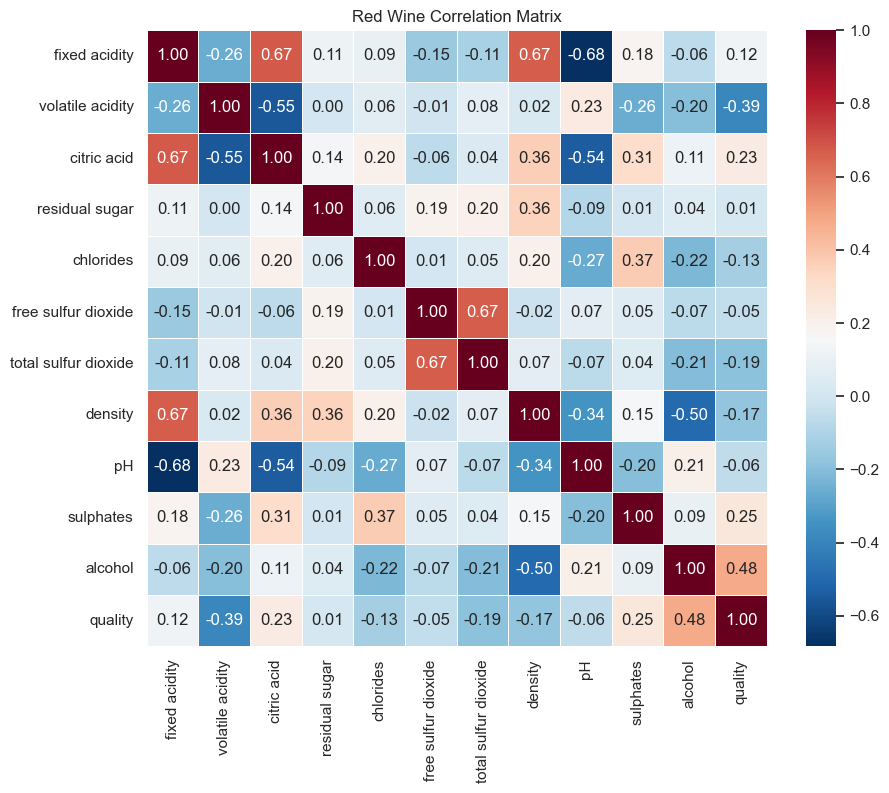

In [10]:
# let's make the data more readable, by adding some color putting it in a heatmap

def create_heatmap(wine_corr, title):

    # create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(wine_corr, annot=True, cmap='RdBu_r', fmt=".2f", linewidth=.5)

    # set plot title
    plt.title(title)

    # show the plot
    plt.show()

create_heatmap(wine_corr, 'Red Wine Correlation Matrix')

You can follow [this example](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec) to create a similar one.

You can increase the plot size using sns.set(rc = {'figure.figsize':(15,8)}). This will increase the size of all your plots, so having this line in every cell you're using seaborn and change their values according to the size of the plot would be a good idea.

You can use similar plots on other variables and features to discover more patterns and relationships. To observe relationships among features with a more microscopic view, joint plots are excellent visualization tools specifically for multivariate visualizations. The following plot explores the relation between sulphates and quality rating for red wine. We have combined one scatterplot and two histogram.

Try to follow [this example](https://seaborn.pydata.org/generated/seaborn.jointplot.html). Remember to add a title!

<Figure size 1000x800 with 0 Axes>

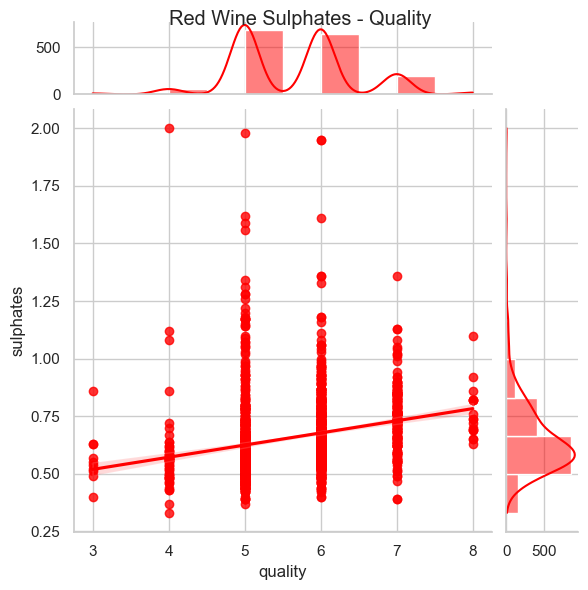

In [11]:
# set the size of the plot
plt.figure(figsize=(10, 8))

# create jointplot with quality and sulphates
sns.jointplot(red_wine, x='quality', y='sulphates', color='red', kind='reg',
              marginal_kws=dict(bins=10), marginal_ticks=True)

# use plt.suptitle to set the main title (plt.title is not directly applicable to jointplot)
plt.suptitle('Red Wine Sulphates - Quality')

# show the plot
plt.show()

After you managed to create this jointplot, do the same for white wines.

<Figure size 1000x800 with 0 Axes>

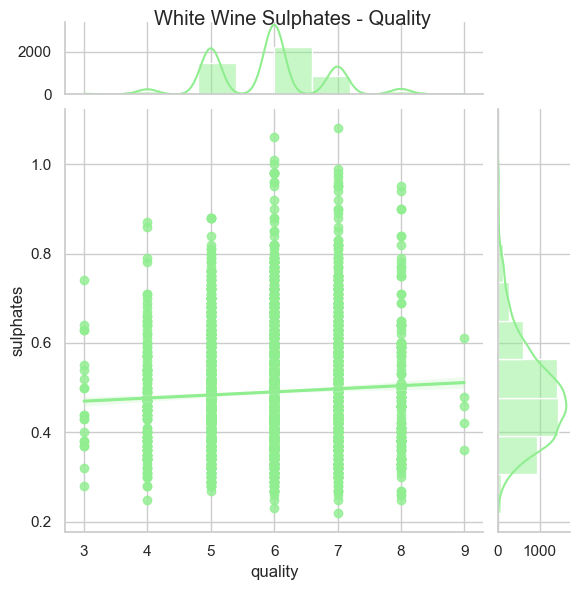

In [12]:
# set the size of the plot
plt.figure(figsize=(10, 8))

# create jointplot with quality and sulphates
sns.jointplot(white_wine, x='quality', y='sulphates', color='lightgreen', kind='reg',
              marginal_kws=dict(bins=10), marginal_ticks=True)

# use plt.suptitle to set the main title (plt.title is not directly applicable to jointplot)
plt.suptitle('White Wine Sulphates - Quality')

# show the plot
plt.show()

What if you would have wanted to visualize a higher number of features and determine patterns from them?

We can use a scatterplot with 3 variables, like the one below.

You can find [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) an example of how to produce a scatterplot.

Try to play with the code, change colors if you want and produce more scatterplot for both red and white wines where you explore 3 variables at the same time.


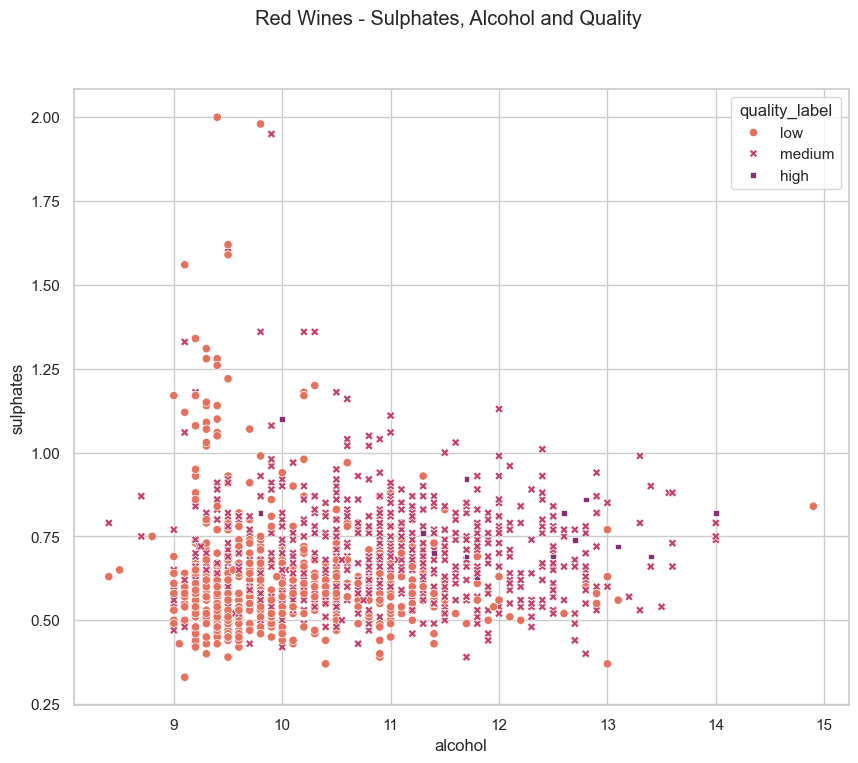

In [24]:
# set the size of the plot
plt.figure(figsize=(10, 8))

# create scatterplot with alcohol, sulphates and quality label
sns.scatterplot(data=red_wine, x='alcohol', y='sulphates', hue='quality_label', style='quality_label',
                palette='flare')

# use plt.suptitle to set the main title
plt.suptitle('Red Wines - Sulphates, Alcohol and Quality')

# show the plot
plt.show()

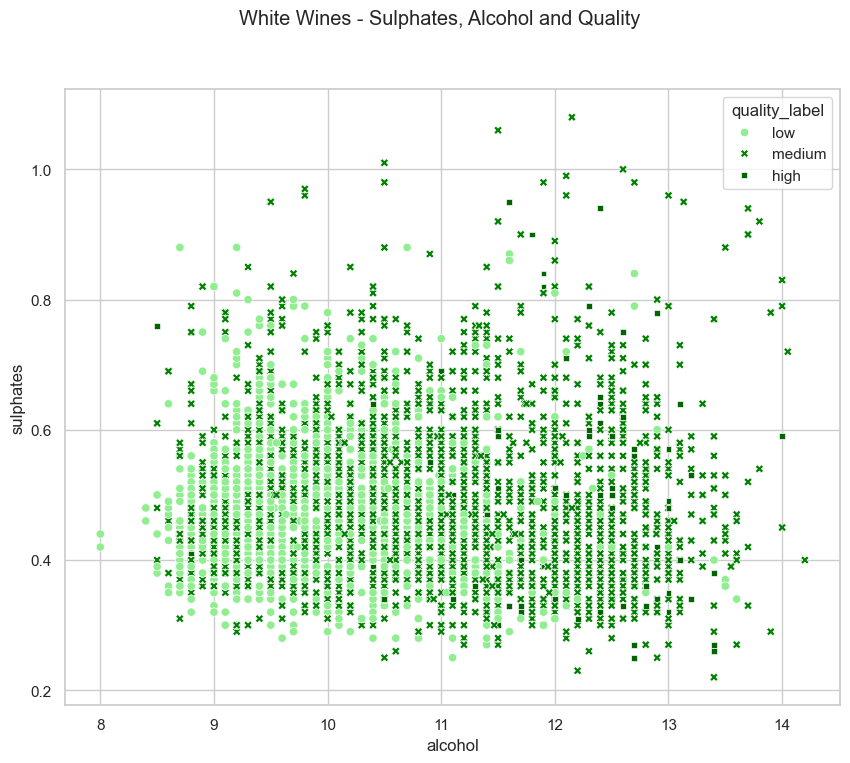

In [44]:
# set the size of the plot
plt.figure(figsize=(10, 8))

# define custom colors for each quality label (this can help to make a value in hue stand out)
custom_palette = {'low': 'lightgreen', 'medium': 'green', 'high': 'darkgreen'}

# create a scatter plot with alcohol, sulphates, and quality label using the custom palette
sns.scatterplot(data=white_wine, x='alcohol', y='sulphates', hue='quality_label', style='quality_label',
                palette=custom_palette)

# use plt.suptitle to set the main title
plt.suptitle('White Wines - Sulphates, Alcohol and Quality')

# show the plot
plt.show()

# Epic 3: Statistical Significance
This is a branch of inferential statistics which draws inferences and propositions of a population using a data sample. The idea is to use statistical methods and models to draw statistical inferences from a given hypotheses. Each hypothesis consists of a null hypothesis and an alternative hypothesis.

Before you move forward, it is a good idea to clear your concept. You can find more details: https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/#Hypothesis

Therefore, based on statistical test results, if the result is statistically significant based on pre-set significance levels (e.g., if obtained p-value is less than 5% significance level), one can reject the null hypothesis in favor of the alternative hypothesis.

Otherwise, if the results is not statistically significant, one can conclude that the null hypothesis was correct.

A great statistical model to prove or disprove the difference in mean among subsets of data is to use the one-way ANOVA test.

